In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Load data
ad_data = pd.read_csv('advertising.csv')

In [3]:
# Check data
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [6]:
# Check for missing values
for col in ad_data.columns:
    percent_missing = np.mean(ad_data[col].isnull())
    print('{} - {}%'.format(col, percent_missing*100))

Daily Time Spent on Site - 0.0%
Age - 0.0%
Area Income - 0.0%
Daily Internet Usage - 0.0%
Ad Topic Line - 0.0%
City - 0.0%
Male - 0.0%
Country - 0.0%
Timestamp - 0.0%
Clicked on Ad - 0.0%


Text(0.5, 1.0, 'Daily Internet Usage')

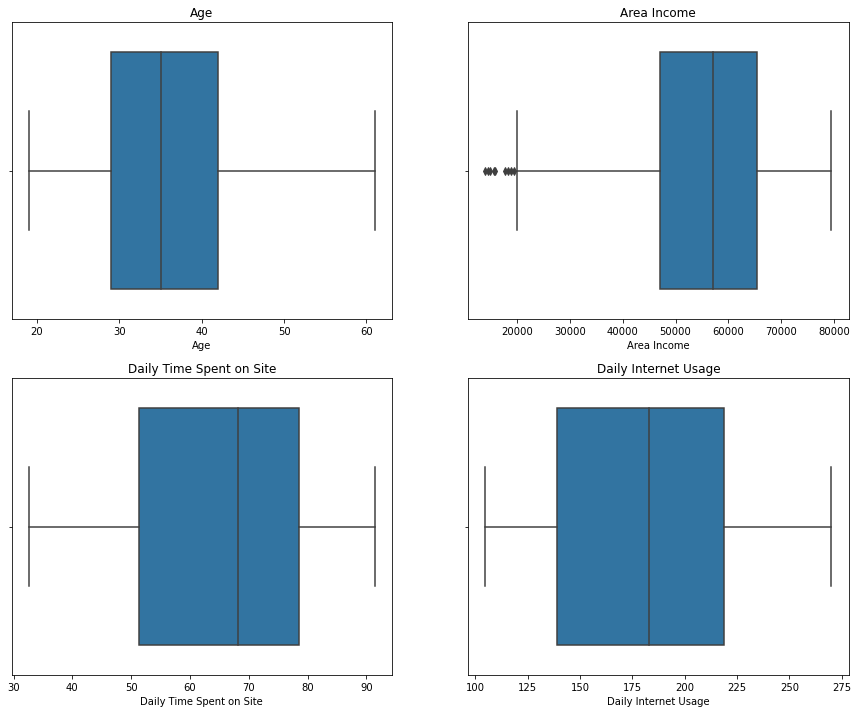

In [7]:
# Check for Outliers
# Boxplot Click vs Age
plt.figure(figsize=(15,12))
plt.subplot(2,2,1)
sns.boxplot(data=ad_data,x='Age',)
plt.title('Age')

# Boxplot Click vs Area Income
plt.subplot(2,2,2)
sns.boxplot(data=ad_data,x='Area Income')
plt.title('Area Income')

# Boxplot Click vs Daily Time Spent on Site
plt.subplot(2,2,3)
sns.boxplot(data=ad_data,x='Daily Time Spent on Site')
plt.title('Daily Time Spent on Site')

# Boxplot Click vs Daily Internet Usage
plt.subplot(2,2,4)
sns.boxplot(data=ad_data,x='Daily Internet Usage')
plt.title('Daily Internet Usage')

Text(0.5, 1.0, 'Area Income')

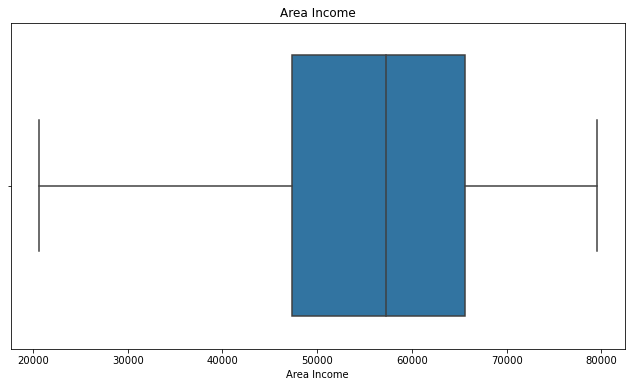

In [9]:
#Calculate Q1, Q3 and IQR
Q1 = ad_data['Area Income'].quantile(0.25)
Q3 = ad_data['Area Income'].quantile(0.75)
IQR = Q3-Q1

#Calculate the Lower and Upper Bound
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

#Exclude any Area Income that lower than the Lower Bound
ad_data = ad_data[~(ad_data['Area Income'] < lower_limit)]

#Check if outliers are gone
plt.figure(figsize = (11,6))
sns.boxplot(data=ad_data,x='Area Income')
plt.title('Area Income')

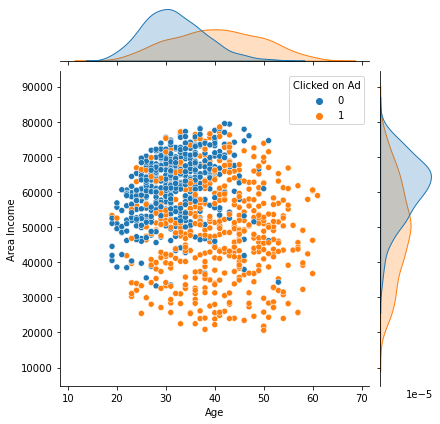

In [12]:
# Jointplot Area Income vs Age
sns.jointplot(data = ad_data, x = 'Age', y = 'Area Income', hue = 'Clicked on Ad')

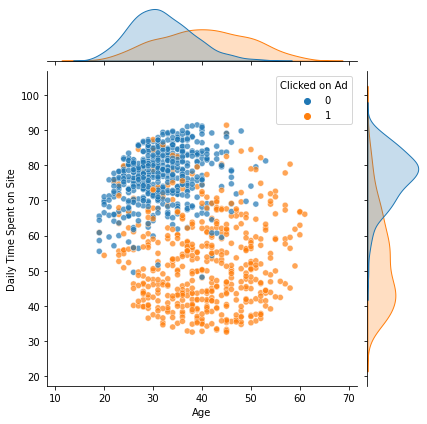

In [14]:
#Jointplot Daily Time spent on site vs Age
sns.jointplot(data = ad_data, x = 'Age', y = 'Daily Time Spent on Site', alpha = 0.7, hue = 'Clicked on Ad')

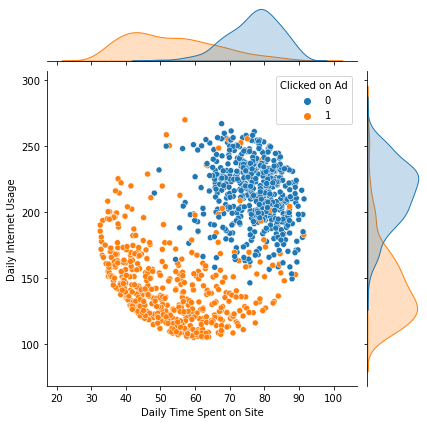

In [15]:
#Jointplot Daily Time Spent on Site vs Daily Internet Usage
sns.jointplot(data = ad_data, x = 'Daily Time Spent on Site', y = 'Daily Internet Usage', hue = 'Clicked on Ad')

In [17]:
# Import libraries for log reg model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,  confusion_matrix

In [20]:
# Split train and test
X  = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]
y = ad_data['Clicked on Ad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
#Fit model
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()

In [23]:
#Predict
predictions = logmodel.predict(X_test)

#Evaluations
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.89      0.96      0.92       167
           1       0.95      0.88      0.92       160

    accuracy                           0.92       327
   macro avg       0.92      0.92      0.92       327
weighted avg       0.92      0.92      0.92       327



[[160   7]
 [ 19 141]]


Text(78.0, 0.5, 'Actual')

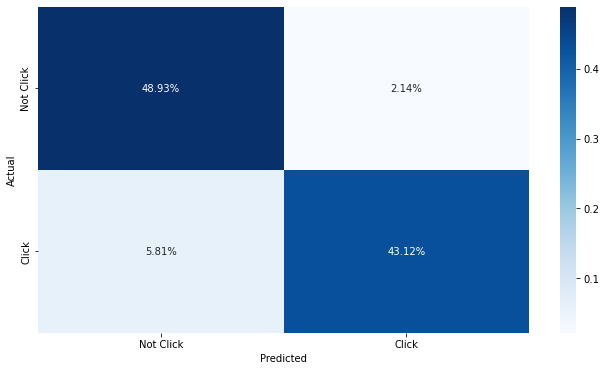

In [26]:
# Confustion Matrix for visualize the evaluations
cf_matrix = confusion_matrix(y_test,predictions)

plt.figure(figsize = (11,6))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True, fmt='.2%', cmap = 'Blues', 
            xticklabels = ['Not Click', 'Click'], 
            yticklabels = ['Not Click', 'Click'])
plt.xlabel('Predicted')
plt.ylabel('Actual')


In [27]:
# Make a prediction

X_JohnDoe = np.array([[70, 35, 60000, 200, 1]])
y_pred = logmodel.predict(X_JohnDoe)
y_pred_prob = logmodel.predict_proba(X_JohnDoe)

print("Prediction:", y_pred, "with the probability array:", y_pred_prob)

Prediction: [0] with the probability array: [[0.71748212 0.28251788]]


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
